In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.set_option('max_columns', None)

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\engineering salary pred\Engineering_graduate_salary.csv")
df

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,B.Tech/B.E.,electronics and communication engineering,70.00,1263,1,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,B.Tech/B.E.,information technology,75.20,9481,0,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,B.Tech/B.E.,information technology,73.19,547,0,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,B.Tech/B.E.,computer engineering,74.81,1629,1,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
df.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [5]:
df.corr()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
ID,1.000000,0.043516,0.671106,0.002656,0.277359,0.025566,0.024103,0.277359,-0.023194,0.021851,0.136531,0.100368,-0.055667,-0.119647,0.027003,-0.122600,0.487400,-0.049300,0.105806,-0.054466,-0.035765,0.181181,0.028239,0.108289,-0.140190,0.027661,-0.250228
10percentage,0.043516,1.000000,0.273813,0.645578,0.028314,-0.144178,0.311209,0.028314,0.114770,-0.017208,0.348452,0.309558,0.328888,0.079927,0.052249,0.091123,-0.013196,0.053343,0.065815,0.049500,0.021410,0.066644,0.136332,-0.007811,-0.131151,0.034869,0.181414
12graduation,0.671106,0.273813,1.000000,0.255780,0.247979,0.004834,0.059786,0.247979,0.005517,0.006758,0.157822,0.103767,0.007854,-0.038321,-0.049095,-0.005440,0.295062,0.025015,0.124642,0.025286,-0.003610,0.110645,0.050309,0.055530,-0.076572,-0.015313,-0.161793
12percentage,0.002656,0.645578,0.255780,1.000000,0.027538,-0.113101,0.335041,0.027538,0.119783,-0.015845,0.211218,0.237480,0.316400,0.073431,0.070979,0.130723,-0.046259,0.041109,0.065761,0.055003,0.002204,0.057277,0.099645,-0.012765,-0.088635,0.007041,0.172755
CollegeID,0.277359,0.028314,0.247979,0.027538,1.000000,0.072848,0.002161,1.000000,0.026276,-0.003479,-0.020104,-0.056061,-0.126496,-0.068298,-0.019750,-0.033202,0.089543,-0.020409,0.024191,0.031839,0.003540,0.073101,0.004176,0.008856,-0.003315,0.005774,-0.114908
CollegeTier,0.025566,-0.144178,0.004834,-0.113101,0.072848,1.000000,-0.088604,0.072848,-0.094247,-0.006719,-0.185937,-0.195125,-0.252881,-0.040989,-0.065872,-0.032474,-0.014718,-0.029641,0.006484,-0.008976,-0.000627,0.045099,-0.042588,-0.010184,0.033292,-0.029322,-0.177975
collegeGPA,0.024103,0.311209,0.059786,0.335041,0.002161,-0.088604,1.000000,0.002161,0.030960,0.008562,0.100617,0.192549,0.219545,0.091883,0.138592,0.031423,0.000075,-0.040812,0.056289,-0.002096,-0.039379,0.052435,0.060789,-0.050995,-0.067701,0.013691,0.131912
CollegeCityID,0.277359,0.028314,0.247979,0.027538,1.000000,0.072848,0.002161,1.000000,0.026276,-0.003479,-0.020104,-0.056061,-0.126496,-0.068298,-0.019750,-0.033202,0.089543,-0.020409,0.024191,0.031839,0.003540,0.073101,0.004176,0.008856,-0.003315,0.005774,-0.114908
CollegeCityTier,-0.023194,0.114770,0.005517,0.119783,0.026276,-0.094247,0.030960,0.026276,1.000000,0.010217,0.043575,0.011322,0.001056,0.005764,0.051726,0.041397,-0.001079,-0.052892,0.000664,0.056309,-0.018694,0.008559,0.010270,0.003624,0.020456,-0.008650,0.011149
GraduationYear,0.021851,-0.017208,0.006758,-0.015845,-0.003479,-0.006719,0.008562,-0.003479,0.010217,1.000000,-0.029161,-0.029016,-0.024857,-0.010880,0.031254,0.008135,0.023413,-0.076916,0.008299,0.004720,0.000920,-0.016745,-0.003956,0.007781,0.001144,0.019407,-0.009333


In [6]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939960,36.780582,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


# Visualizations

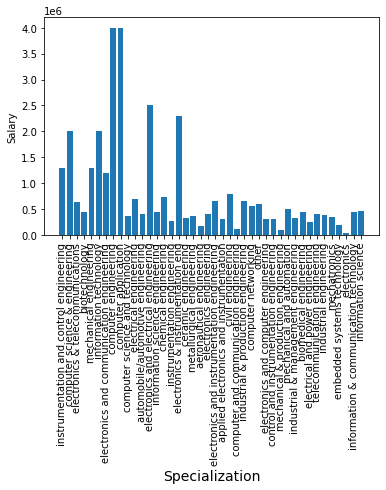

In [7]:
plt.bar('Specialization', 'Salary',data=df)

plt.xticks(rotation=90)
plt.xlabel('Specialization',fontsize = 14)
plt.ylabel('Salary')
plt.rcParams["figure.figsize"] = (20,12.5)



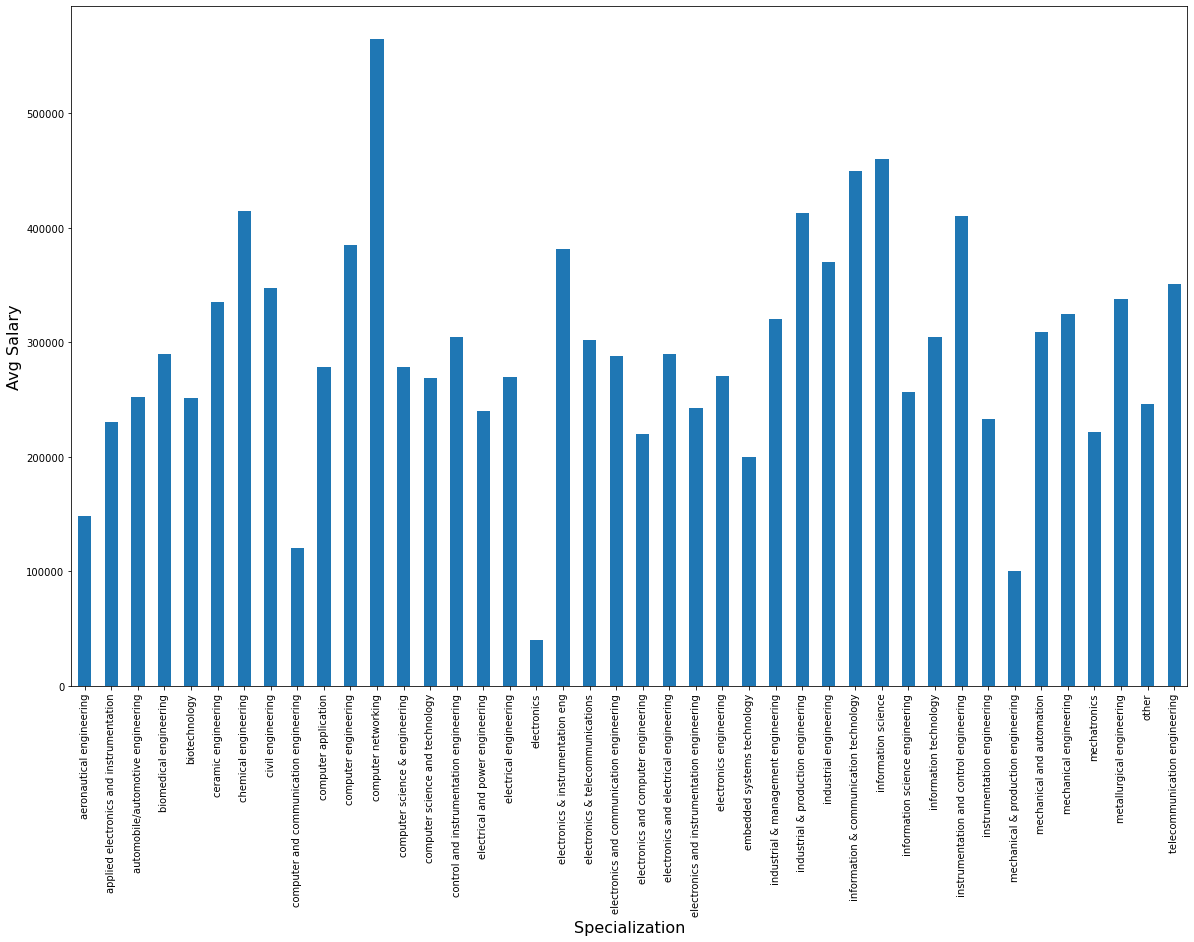

In [8]:
#average salary for each Specialization
plt.figure()
df.groupby(['Specialization'])['Salary'].mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Avg Salary',fontsize = 16)
plt.rcParams["figure.figsize"] = (18,12.5)


Those who done their Specialization in Computer Networking have highest average salary

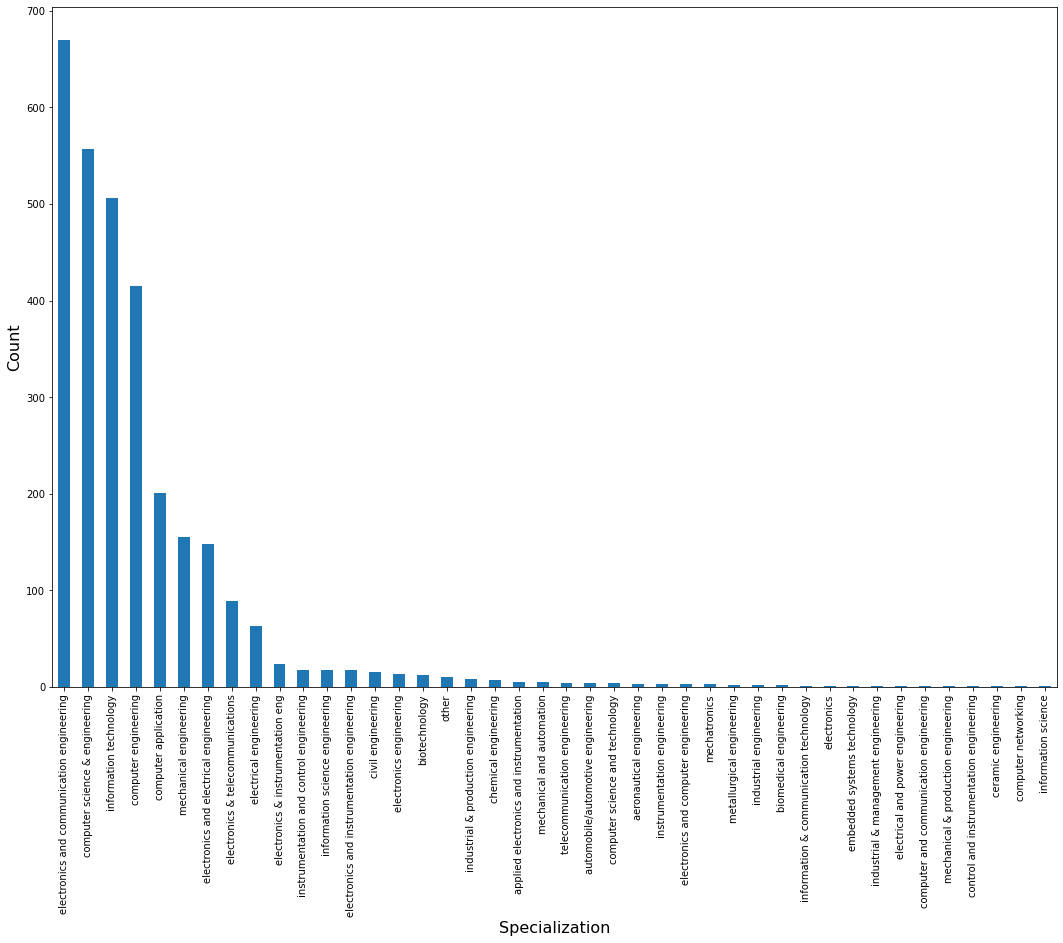

In [9]:
plt.figure() #to plot the value counts as barplot
df.Specialization.value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Specialization',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.rcParams["figure.figsize"] = (18,12.5)

Electronics and communication engineering have higher strength
and Computer Science engineering have second highest strength

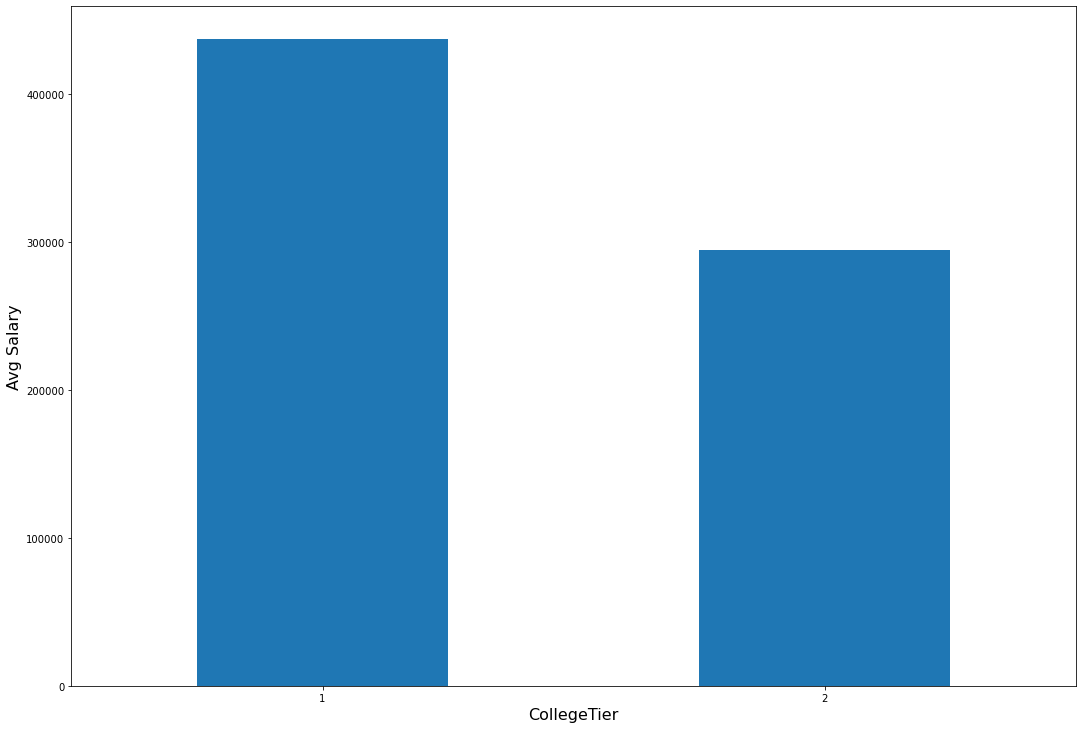

In [10]:
#avg salary according to the college tier
plt.figure()
df.groupby(['CollegeTier'])['Salary'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('CollegeTier',fontsize = 16)
plt.ylabel('Avg Salary',fontsize = 16)
plt.rcParams["figure.figsize"] = (10,10.5)


m    2282
f     716
Name: Gender, dtype: int64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


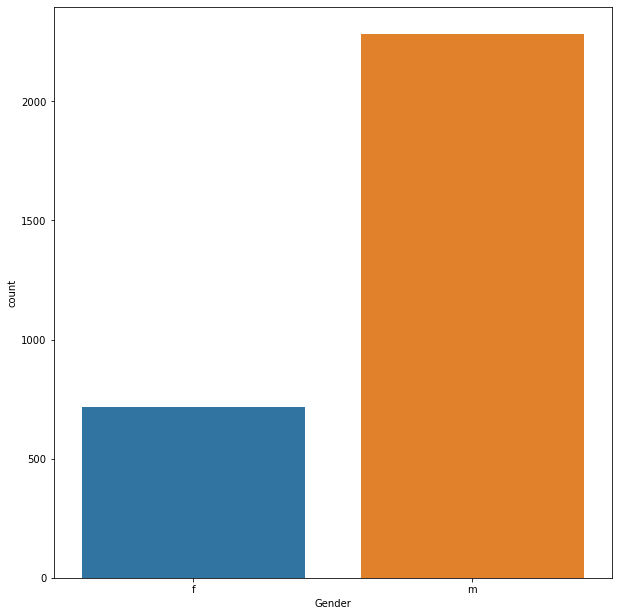

In [11]:
sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Highest percentage is: 97.76 %


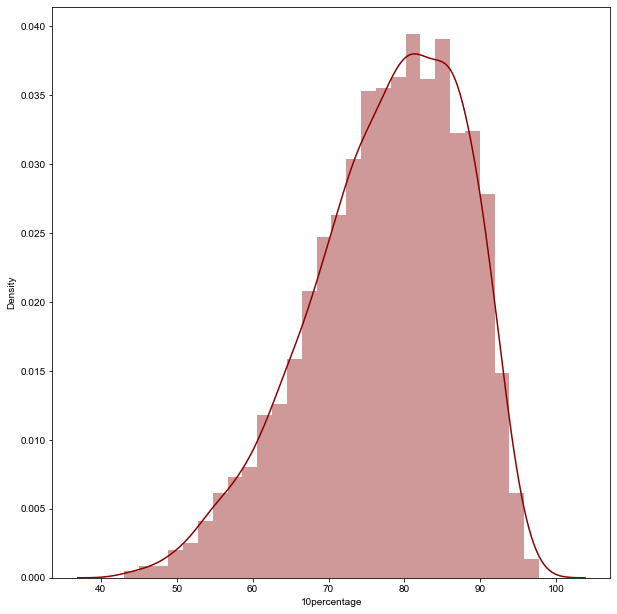

In [12]:
sns.distplot(df['10percentage'],color='darkred')
print("Highest percentage is:",df['10percentage'].max(),"%")
sns.set(rc={'figure.figsize':(8,4)})


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Highest percentage is: 98.7 %


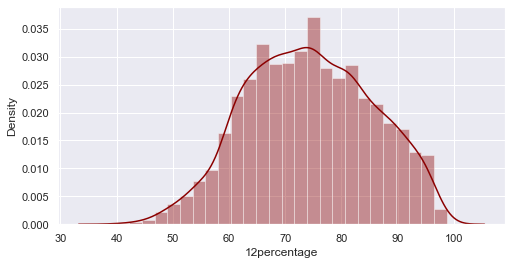

In [13]:
sns.distplot(df['12percentage'],color='darkred')
print("Highest percentage is:",df['12percentage'].max(),"%")
sns.set(rc={'figure.figsize':(10,6)})


From the two upper graphs we got to know that large no. of these students got high percentage in 10th than in 12th...



C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

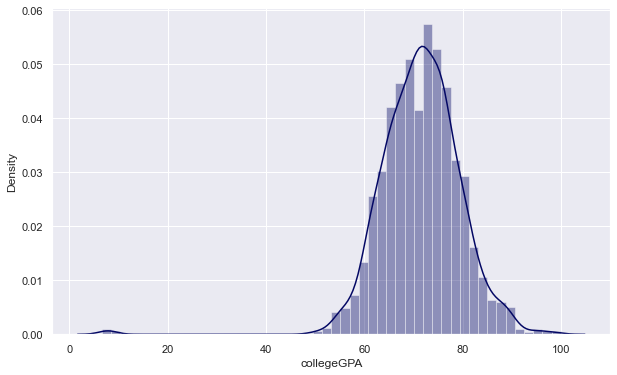

In [14]:
sns.distplot(df['collegeGPA'],color='#030764')

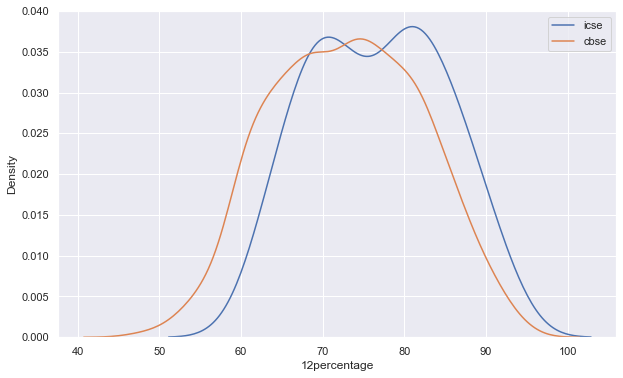

In [15]:
# CBSE VS ICSE board
cbse=df.loc[df['12board']=='cbse']
icse=df.loc[df['12board']=='icse']
sns.kdeplot(icse['12percentage'],label='icse')
sns.kdeplot(cbse['12percentage'],label='cbse')
plt.legend()

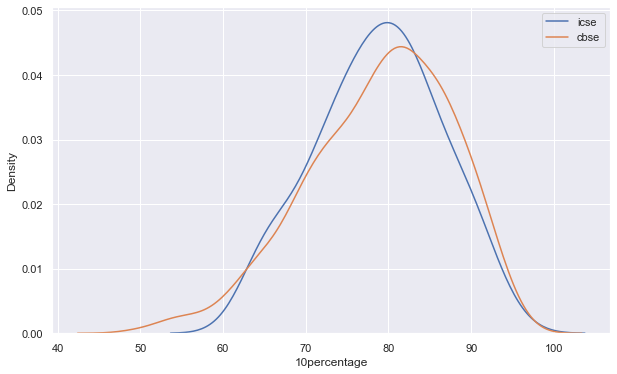

In [16]:
sns.kdeplot(icse['10percentage'],label='icse')
sns.kdeplot(cbse['10percentage'],label='cbse')
plt.legend()

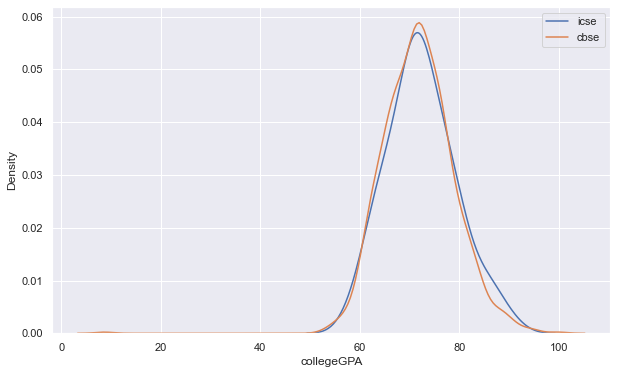

In [17]:
sns.kdeplot(icse['collegeGPA'],label='icse')
sns.kdeplot(cbse['collegeGPA'],label='cbse')
plt.legend()

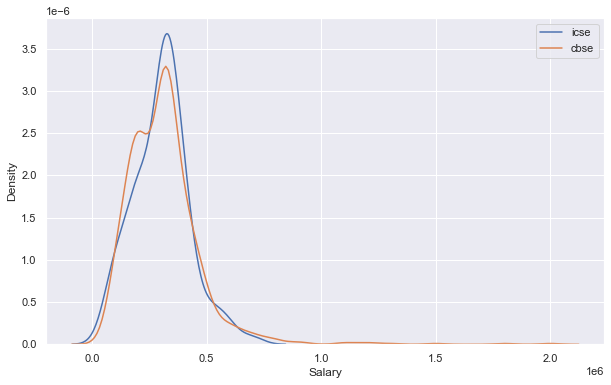

In [18]:
sns.kdeplot(icse['Salary'],label='icse')
sns.kdeplot(cbse['Salary'],label='cbse')
plt.legend()

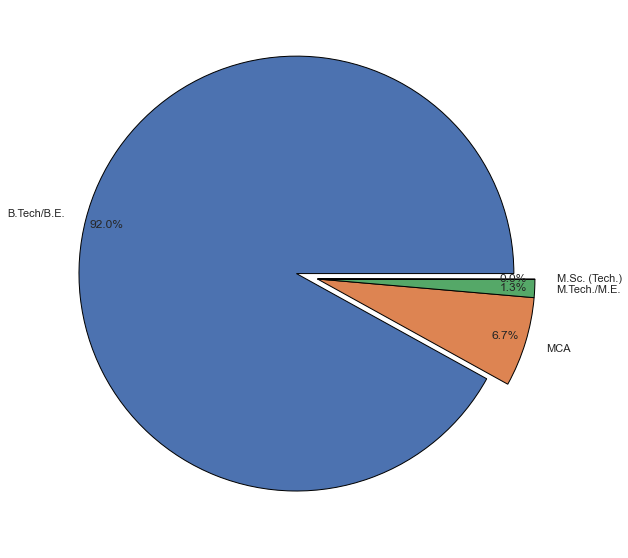

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64


In [19]:
index=df['Degree'].value_counts().index
values=df['Degree'].value_counts()
plt.figure(figsize=(18,10))

plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0,0,0],pctdistance=0.9)
plt.show()
print(df['Degree'].value_counts())

In [20]:
cse=df.loc[df['Specialization']=='computer science & engineering']
ecm=df.loc[df['Specialization']=='electronics and communication engineering']
IT=df.loc[df['Specialization']=='information technology']


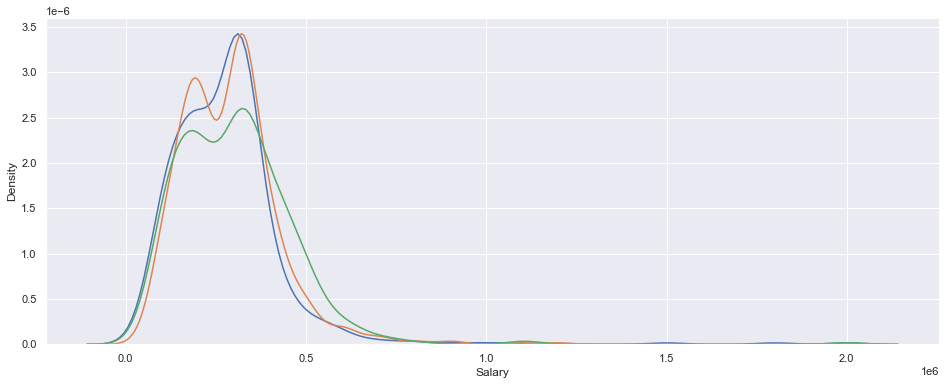

In [21]:
plt.figure(figsize=(16,6))
sns.kdeplot(cse['Salary'])
sns.kdeplot(ecm['Salary'])
sns.kdeplot(IT['Salary'])
plt.show()


In [22]:
print(cse['Salary'].max())
print(ecm['Salary'].max())
print(IT['Salary'].max())



2000000
1200000
2000000


The maximum salary with highest number of people in these specializations have salary upto 20 Lakhs, so question arises which specializations have the highest salary of all...

In [23]:
df['Salary'].max()


4000000

In [24]:
highest=df.loc[df['Salary']==4000000]
highest['Specialization']

2295    computer engineering
2964    computer application
Name: Specialization, dtype: object

Now there can be specializations which have salary greater than 20 lakhs and less than 40 Lakhs...



In [25]:
less_40=df.loc[(df['Salary']>2000000) & (df['Salary']<4000000)]
less_40['Specialization']

582                       computer engineering
1024    electronics and electrical engineering
1460                      computer engineering
2244         electronics & instrumentation eng
Name: Specialization, dtype: object

Now Lets compare College GPA with salary that if it matters or not?



In [26]:
#Lets take gpa greater than 95...

gpa_95=df.loc[df['collegeGPA']>95]
gpa_95['Salary']

5        440000
441      500000
723      370000
811     1200000
864     1100000
1995     560000
2360     800000
2450     380000
Name: Salary, dtype: int64

So GPA greater than 95 have maximum salary of 12 lakhs and the highest salaries have the following GPA's...

In [27]:
#GPA of people having salaries greater than 12 lakhs

Salary_12=df.loc[df['Salary']>1200000]
Salary_12['collegeGPA']

77      64.00
198     69.90
207     66.23
443     83.70
582     72.00
1024    63.30
1088    84.40
1307    62.40
1460    69.00
1806    71.80
2127    72.00
2244    76.50
2249    79.90
2295    72.60
2314    66.00
2964    65.00
Name: collegeGPA, dtype: float64

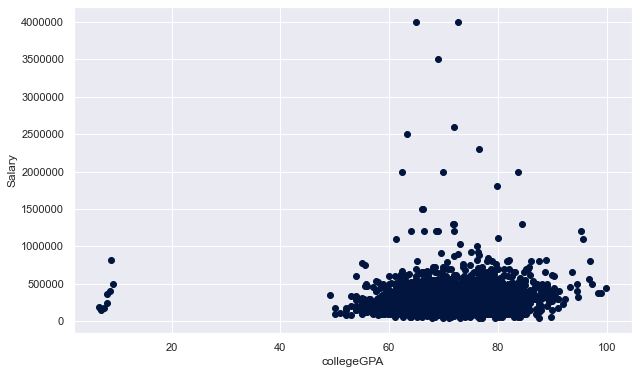

In [28]:
plt.scatter(x=df['collegeGPA'],y=df['Salary'],color='#01153E')
plt.subplot().ticklabel_format(useOffset=False,style='plain')
plt.xlabel('collegeGPA')
plt.ylabel("Salary")
plt.show()

so most of the people who got 60 to 80 % of gpa getting higher salary

# Preprocessing

In [29]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [30]:
# Drop ID column
df = df.drop('ID', axis=1)
    
   

In [31]:
 # Binary encoding
df['Gender'] = df['Gender'].replace({'f': 0, 'm': 1})
    
    
    

In [32]:
# Date encoding
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB_year'] = df['DOB'].apply(lambda x: x.year)
df['DOB_month'] = df['DOB'].apply(lambda x: x.month)
df['DOB_day'] = df['DOB'].apply(lambda x: x.day)
df = df.drop('DOB', axis=1)
    
    

In [33]:
# One-hot encoding
for column in ['10board', '12board', 'Degree', 'Specialization', 'CollegeState']:
    df = onehot_encode(df, column)
    
   

In [34]:
 # Encode and fill missing values
df = df.replace(-1, np.NaN)
missing_columns = [column for column in df.columns if df.isna().sum()[column] > 0]
for column in missing_columns:
    df[column] = df[column].fillna(df[column].mean())

In [35]:
 # Split df into X and y
y = df['Salary']
X = df.drop('Salary', axis=1)
    
    

In [36]:
y

0       445000
1       110000
2       255000
3       420000
4       200000
         ...  
2993    120000
2994    120000
2995    385000
2996    530000
2997    200000
Name: Salary, Length: 2998, dtype: int64

In [37]:
X

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOB_year,DOB_month,DOB_day,10board_0,10board_aisse,10board_andhra pradesh board ssc,10board_andhra pradesh state board,10board_anglo indian,10board_ap state board,10board_ap state board for secondary education,10board_apsche,10board_apssc,10board_aurangabad board,10board_bharathi matriculation school,10board_bihar board,10board_bihar school examination board,10board_bihar school examination board patna,"10board_bihar secondary education board,patna",10board_biharboard,10board_board of secondary education,10board_board of high school and intermediate education uttarpradesh,10board_board of school education harayana,10board_board of secendary education orissa,10board_board of secondary education,10board_board of secondary education (bse) orissa,10board_board of secondary education - andhra pradesh,10board_board of secondary education orissa,10board_board of secondary education(bse) orissa,"10board_board of secondary education, andhra pradesh","10board_board of secondary education, rajasthan","10board_board of secondary education,andhara pradesh","10board_board of secondary education,andhra pradesh","10board_board of secondary education,ap",10board_board of secondary school education,10board_board of ssc education andhra pradesh,"10board_board ofsecondary education,ap",10board_board secondary education,"10board_bright way college, (up board)",10board_bse,"10board_bse, odisha","10board_bse,odisha","10board_bse,orissa",10board_bseb,10board_bseb patna,"10board_bseb, patna","10board_bseb,patna",10board_bsemp,10board_bsepatna,10board_cbsc,10board_cbse,10board_cbse,10board_cbse board,10board_central board of secondary education,"10board_central board of secondary education, new delhi",10board_certificate of middle years program of ib,10board_cgbse,10board_council for indian school certificate examination,"10board_dav public school,hehal",10board_delhi board,10board_delhi public school,10board_education board of kerala,10board_ghseb,10board_gseb,10board_gsheb,10board_gujarat board,10board_gujarat state board,10board_gyan bharati school,10board_haryana board of school education,10board_hbsc,10board_hbse,10board_himachal pradesh board,10board_himachal pradesh board of school education,10board_hsc,10board_hsce,10board_hse,"10board_hse,board","10board_hse,orissa",10board_icse,10board_icse board,"10board_icse board , new delhi",10board_j & k bord,10board_j&k state board of school education,10board_jawahar navodaya vidyalaya,"10board_jbse,jharkhand",10board_jharkhand academic council,10board_jharkhand acedemic council,10board_jharkhand secondary board,10board_jharkhand secondary education board,10board_jharkhand secondary examination board (ranchi),10board_jkbose,10board_jseb,10board_kalaimagal matriculation higher secondary school,10board_karnataka,10board_karnataka board,10board_karnataka board of higher education,10board_karnataka board of secondary education,10board_karnataka education board,10board_karnataka education board (keeb),10board_karnataka secondary education,10board_karnataka secondary education board,10board_karnataka secondary education examination board,10board_karnataka secondary eduction,10board_karnataka secondary school of examination,10board_karnataka secondory education board,10board_karnataka sslc board bangalore,10board_karnataka state board,10board_karnataka state education examination board,10board_karnataka state secondary education board,10board_kea,10board_kerala state board,10board_kerala state technical education,10board_kiran english medium high school,10board_kolhapur,10board_ksbe,10board_kseb,10board_kseeb,10board_kseeb(karnataka secondary education examination board),10

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    

In [39]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    


In [40]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

139

In [42]:
corr_features


{'12board_0',
 '12board_aissce',
 '12board_all india board',
 '12board_amravati divisional board',
 '12board_andhpradesh board of intermediate education',
 '12board_andhra pradesh state board',
 '12board_ap board for intermediate education',
 '12board_aurangabad board',
 '12board_biec patna',
 '12board_biec,patna',
 '12board_biec-patna',
 '12board_bihar intermediate education council',
 '12board_board of high school and intermediate education uttarpradesh',
 '12board_board of higher secondary orissa',
 '12board_board of intermeadiate education',
 '12board_board of intermediate education, andhra pradesh',
 '12board_board of intermediate education,hyderabad',
 '12board_board of intermediate education:ap,hyderabad',
 '12board_board of intermidiate education,ap',
 '12board_board of intmediate education ap',
 '12board_board of school education harayana',
 '12board_bseb, patna',
 '12board_cbsc',
 '12board_cbse',
 '12board_central board of secondary education',
 '12board_central board of seco

In [43]:
#droping correlated features
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOB_month,DOB_day,10board_0,10board_aisse,10board_andhra pradesh board ssc,10board_andhra pradesh state board,10board_anglo indian,10board_ap state board,10board_ap state board for secondary education,10board_apsche,10board_apssc,10board_aurangabad board,10board_bharathi matriculation school,10board_bihar board,10board_bihar school examination board,10board_bihar school examination board patna,"10board_bihar secondary education board,patna",10board_biharboard,10board_board of secondary education,10board_board of high school and intermediate education uttarpradesh,10board_board of school education harayana,10board_board of secendary education orissa,10board_board of secondary education,10board_board of secondary education (bse) orissa,10board_board of secondary education - andhra pradesh,10board_board of secondary education orissa,10board_board of secondary education(bse) orissa,"10board_board of secondary education, andhra pradesh","10board_board of secondary education, rajasthan","10board_board of secondary education,andhara pradesh","10board_board of secondary education,andhra pradesh","10board_board of secondary education,ap",10board_board of secondary school education,10board_board of ssc education andhra pradesh,"10board_board ofsecondary education,ap",10board_board secondary education,"10board_bright way college, (up board)",10board_bse,"10board_bse, odisha","10board_bse,odisha","10board_bse,orissa",10board_bseb,10board_bseb patna,"10board_bseb, patna","10board_bseb,patna",10board_bsemp,10board_bsepatna,10board_cbsc,10board_cbse,10board_cbse,10board_cbse board,10board_central board of secondary education,"10board_central board of secondary education, new delhi",10board_certificate of middle years program of ib,10board_cgbse,10board_council for indian school certificate examination,"10board_dav public school,hehal",10board_delhi board,10board_delhi public school,10board_education board of kerala,10board_ghseb,10board_gseb,10board_gsheb,10board_gujarat board,10board_gujarat state board,10board_gyan bharati school,10board_haryana board of school education,10board_hbsc,10board_hbse,10board_himachal pradesh board,10board_himachal pradesh board of school education,10board_hsc,10board_hsce,10board_hse,"10board_hse,board","10board_hse,orissa",10board_icse,10board_icse board,"10board_icse board , new delhi",10board_j & k bord,10board_j&k state board of school education,10board_jawahar navodaya vidyalaya,"10board_jbse,jharkhand",10board_jharkhand academic council,10board_jharkhand acedemic council,10board_jharkhand secondary board,10board_jharkhand secondary education board,10board_jharkhand secondary examination board (ranchi),10board_jkbose,10board_jseb,10board_kalaimagal matriculation higher secondary school,10board_karnataka,10board_karnataka board,10board_karnataka board of higher education,10board_karnataka board of secondary education,10board_karnataka education board,10board_karnataka education board (keeb),10board_karnataka secondary education,10board_karnataka secondary education board,10board_karnataka secondary education examination board,10board_karnataka secondary eduction,10board_karnataka secondary school of examination,10board_karnataka secondory education board,10board_karnataka sslc board bangalore,10board_karnataka state board,10board_karnataka state education examination board,10board_karnataka state secondary education board,10board_kea,10board_kerala state board,10board_kerala state technical education,10board_kiran english medium high school,10board_kolhapur,10board_ksbe,10board_kseb,10board_kseeb,10board_kseeb(karnataka secondary education examination board),10board_ksseb,10board_ksseb(karnataka st

In [44]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


xgb_r2 = xgb_model.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb_r2))

XGBoost R^2 Score: 0.08764


In [66]:
#to see all the metrics
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [46]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [61]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [62]:
random_search=RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,scoring='r2',n_jobs=-1,cv=5,verbose=3)


In [63]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [64]:
print(random_search.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [65]:
random_search.best_params_


{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [73]:
xgb_model1 = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)


In [74]:
xgb_model1.fit(X_train, y_train)


xgb1_r2 = xgb_model1.score(X_test, y_test)

print("XGBoost R^2 Score: {:.5f}".format(xgb1_r2))

XGBoost R^2 Score: 0.14087


In [75]:
y_predict = xgb_model1.predict(X_test)


In [76]:
y_predict

array([342366.6 , 205032.89, 218493.55, 382842.28, 329529.4 , 408486.72,
       294221.8 , 374984.97, 292083.94, 256690.4 , 243459.16, 288901.5 ,
       231339.06, 201901.9 , 193203.58, 305496.06, 272176.28, 364952.97,
       268229.88, 232826.6 , 173177.95, 319668.16, 211430.8 , 177047.95,
       300771.  , 260637.36, 345977.03, 221804.62, 222264.44, 307270.25,
       277652.9 , 297115.75, 210229.  , 206982.61, 315918.88, 316711.72,
       262191.28, 524439.2 , 471475.1 , 284582.3 , 204916.69, 294846.2 ,
       434264.6 , 301147.5 , 336571.6 , 280879.72, 222362.7 , 223485.98,
       215919.2 , 462137.62, 266682.38, 296916.06, 269351.22, 279288.62,
       350985.3 , 426849.72, 319889.16, 368669.38, 282997.75, 299265.44,
       255744.48, 466056.78, 406364.94, 285768.8 , 279170.2 , 204859.02,
       185371.  , 412419.47, 247391.72, 167252.92, 387217.4 , 311226.47,
       758358.6 , 359795.62, 353104.5 , 496495.8 , 244060.58, 347407.06,
       570952.4 , 347410.3 , 321651.9 , 285705.5 , 

In [77]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [79]:
#score variables
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(xgb_model1, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(xgb_model1,XGBRegressor(),X,y,5)

 Mean Absolute Error: 103831.25

 Mean Squared Error: 52306387044.19

 R^2 Score: 0.1409

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) Scores:
0.12
-0.07
-0.05
0.08
0.01
Average XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, e